# Agglomerative Clustering
1. This is the bottom-up approach.
2. Each data point is treated as a single cluster initially.
3. Then, the groups are created with the combination of the nearest points.
4. This process is repeated until finally one single cluster is formed which encompasses all the datapoints.

**NOTE:** Divisive Clustering method is opposite of this. It's called as top-down approach. Initially there will be only one single cluster it will be divided continuously untill each datapoint is considered as clusters.

### Types of Distance measures for grouping datapoints into Clusters
1. Complete - Linkage Clustering - In this technique the maximum possible distance between points belonging to 2 different clusters are identified and the link will be between the clusters which are nearer to each other.
2. Single - Linkage Clustering - In this technique the minimum possible distance between points belonging to 2 different clusters are identified and the link will be between the clusters which are nearer to each other.
3. Mean - Linkage Clustering - In this technique, find all the possible pairs between different clusters. Then, calculate the mean of these possible pairs. Then, the link will be between the clusters where mean is lesser.
4. Centroid - Linkage Clustering - In this technique, find the centroids between the datapoints within the cluster. Then, connect between the centroids of each cluster. Then, the link will be between the clusters where the distance is lesser.
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
shopping_df=pd.read_csv('shopping_data.csv')

In [2]:
shopping_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
shopping_filtered_df=shopping_df.iloc[:,3:5]
shopping_filtered_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
shopping_filtered_df.shape

(200, 2)

In [6]:
import scipy.cluster.hierarchy as shc

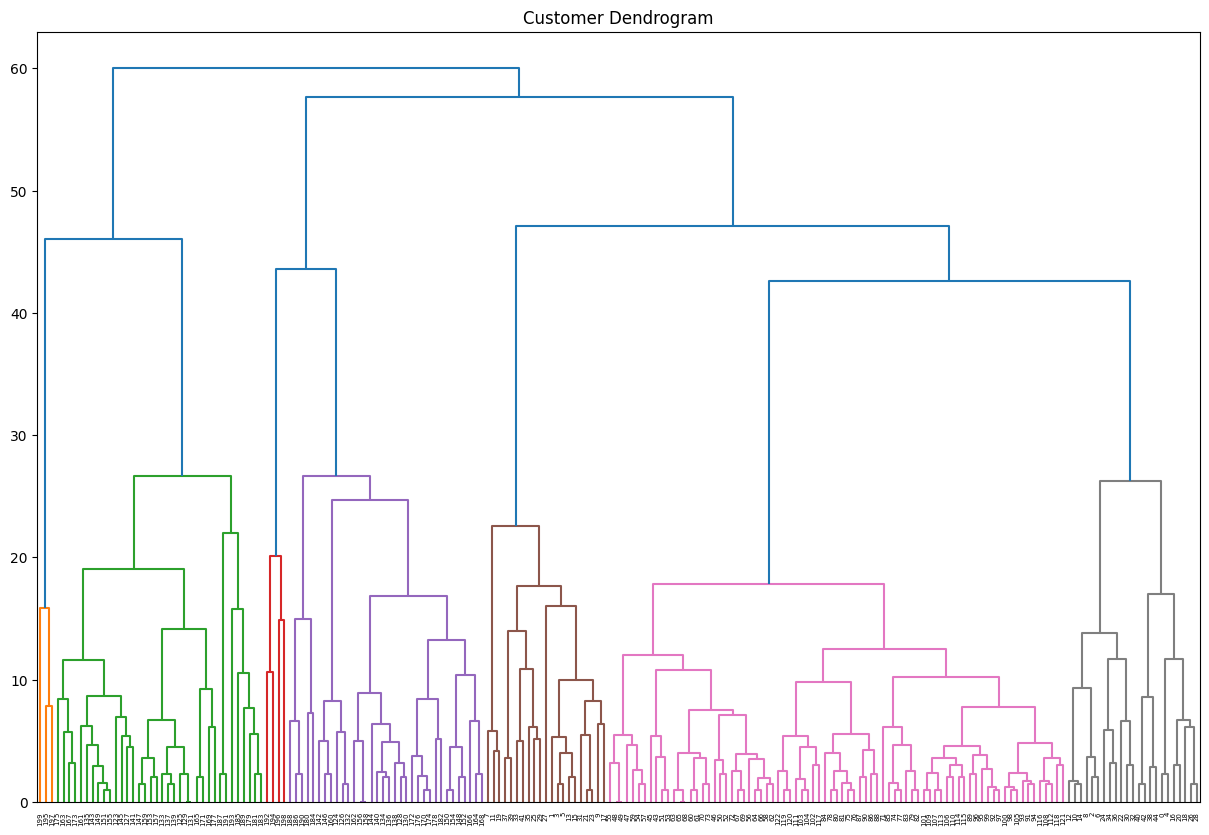

In [12]:
plt.figure(figsize=(15,10))
plt.title("Customer Dendrogram")
dend=shc.dendrogram(shc.linkage(shopping_filtered_df,method='average'))

### Inferences
Find the number of clusters possible ? Consider the area where there is highest dissimilarity. draw a line parallel to x-axis at that area. Then count the intersection points. This count is considered as the number of clusters.


In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
agglo_cluster_model=AgglomerativeClustering(n_clusters=7,linkage='average') #Use the same linkage method as the one used in Dendrogram

In [15]:
agglo_cluster_model.fit_predict(shopping_filtered_df) #Unsupervised 

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 6,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 5, 0, 5, 4, 5, 4,
       5, 4], dtype=int64)

In [24]:
shopping_df['Agglo_Cluster_Labels']=agglo_cluster_model.labels_

In [25]:
shopping_df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agglo_Cluster_Labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


Text(0, 0.5, 'Spending Score')

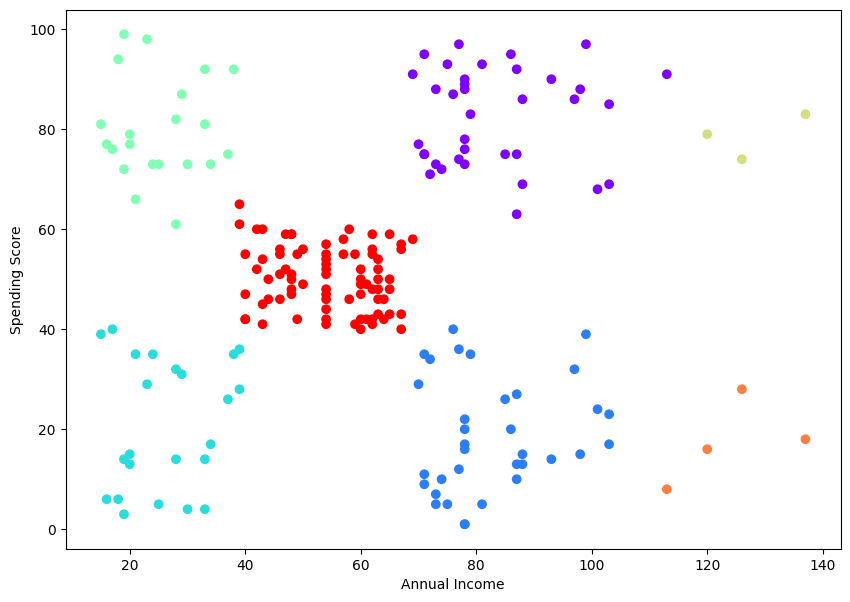

In [23]:
#Plot the graph
plt.figure(figsize=(10,7))
plt.scatter(shopping_filtered_df.iloc[:,0],shopping_filtered_df.iloc[:,1],c=agglo_cluster_model.labels_,cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")